In [2]:
import torch
from torchvision import models, transforms
from  PIL import Image
import torch.nn as nn

In [3]:
# Load the saved model
model= models.resnet18(pretrained=True)
model.fc= nn.Linear(model.fc.in_features, 1000)
model.load_state_dict(torch.load("flower_classification_model.pth"))
model.eval()

new_model= models.resnet18(pretrained=True)
new_model.fc= nn.Linear(new_model.fc.in_features, 2)

new_model.fc.weight.data=model.fc.weight.data[0:2]
new_model.fc.bias.data=model.fc.bias.data[0:2]

In [15]:
image_path= r"D:\Image-Classification-using-torch\dataset\test\daisy\476856232_7c35952f40_n_jpg.rf.6be1b321438811a3c99520214ef73de2.jpg"
image= Image.open(image_path)
preprocess= transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor= preprocess(image)
input_batch= input_tensor.unsqueeze(0)

In [12]:
with torch.no_grad():
    output=model(input_batch)

_, predicted_class= output.max(1)

class_name=['daisy','dendelion']
predicted_class_name= class_name[predicted_class.item()]
print('The predicted class is: ', predicted_class_name)

The predicted class is:  daisy


Text(10, 10, 'Predicted: daisy')

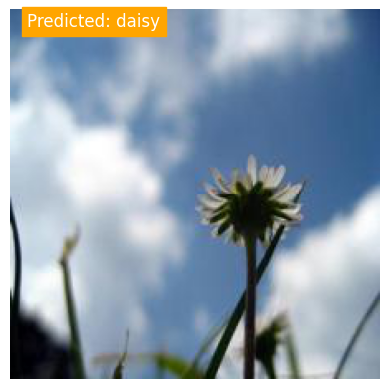

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

image= np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='orange')